# Phase 2 Project

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
home = pd.read_csv('data/kc_house_data.csv')

In [3]:
home.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
home.shape

(21597, 21)

In [5]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
home.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
home['waterfront'].fillna(0, inplace = True)

In [8]:
home['view'].fillna(0, inplace = True)

In [9]:
home.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
home = home.drop(columns = ['id', 'yr_renovated', 'date' ], axis = 1)

In [11]:
home.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# removing question marks from data
home = home[(home != '?').all(axis=1)]

In [13]:
home = home.dropna()

In [14]:
home.shape

(21143, 18)

In [15]:
home.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
home['sqft_basement'] = home['sqft_basement'].astype(float)

In [17]:
#home = pd.get_dummies(home, prefix=['grade'], columns=['grade'])

In [18]:
home.shape

(21143, 18)

# Looking at our Target 

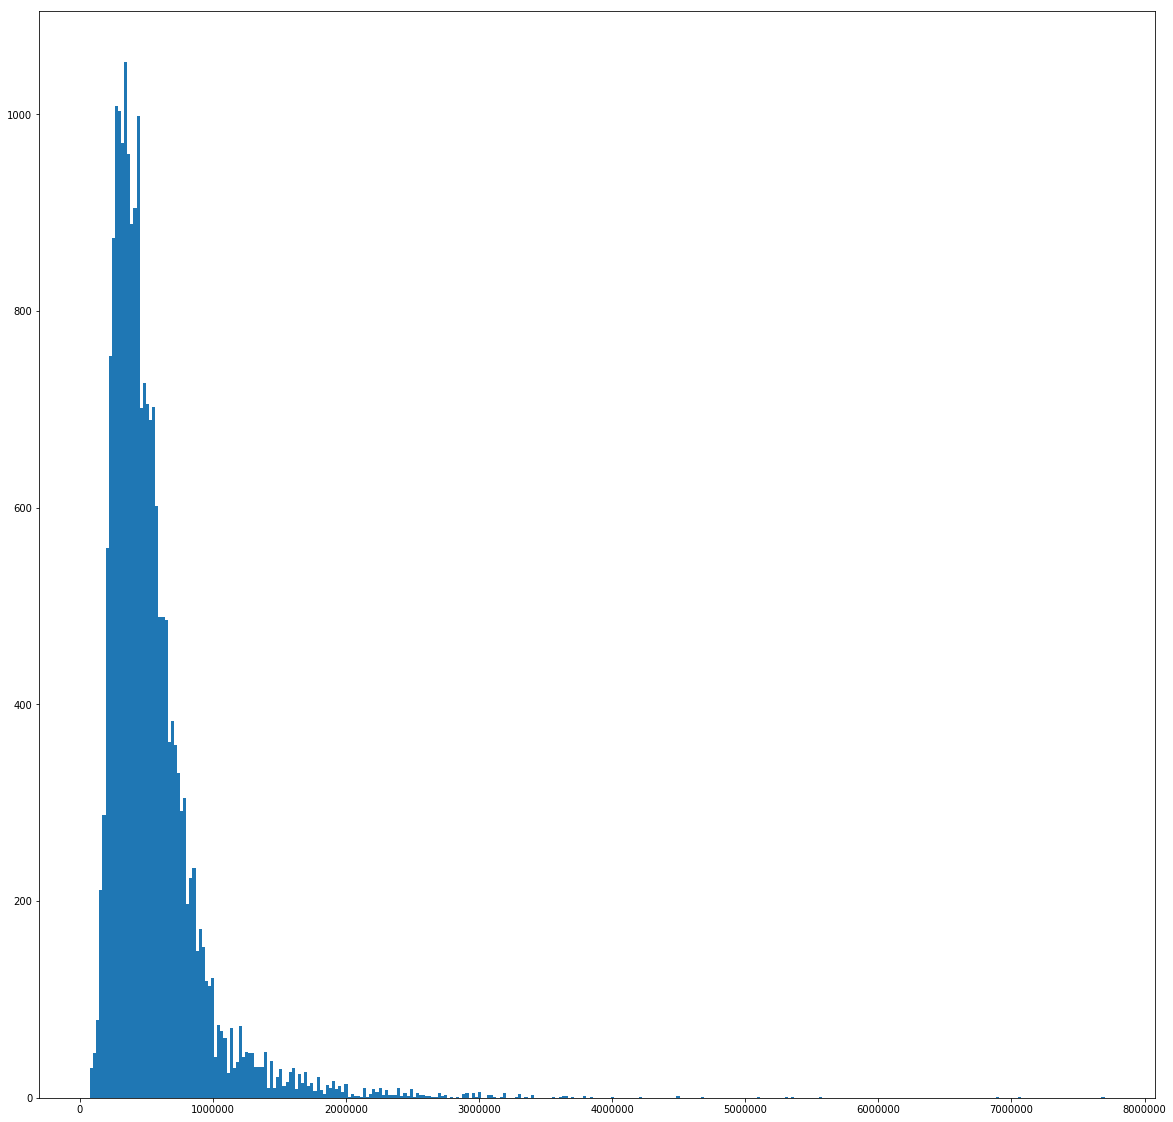

In [19]:
fig, ax = plt.subplots(figsize= (20,20))

ax.hist(home['price'], bins = 'auto');

In [20]:
X = home.drop('price', axis = 1)
Y = home['price']

# Scaling the target to be normally distributed 

In [23]:
Y_scaled = np.log(Y)

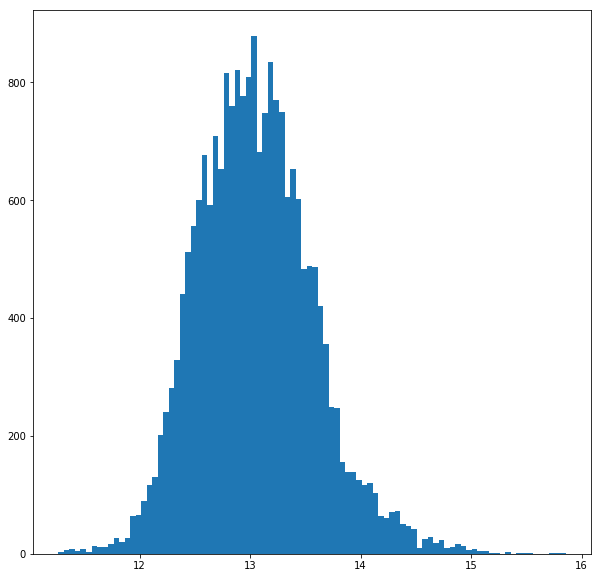

In [25]:
fig, ax = plt.subplots(figsize= (10,10))

ax.hist(Y_scaled, bins = 'auto');

** I decided to change my Y so its normally distrubited **

In [26]:
Y =  np.log(Y)

# Train / Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 12998 to 16139
Data columns (total 17 columns):
bedrooms         15857 non-null int64
bathrooms        15857 non-null float64
sqft_living      15857 non-null int64
sqft_lot         15857 non-null int64
floors           15857 non-null float64
waterfront       15857 non-null float64
view             15857 non-null float64
condition        15857 non-null int64
grade            15857 non-null int64
sqft_above       15857 non-null int64
sqft_basement    15857 non-null float64
yr_built         15857 non-null int64
zipcode          15857 non-null int64
lat              15857 non-null float64
long             15857 non-null float64
sqft_living15    15857 non-null int64
sqft_lot15       15857 non-null int64
dtypes: float64(7), int64(10)
memory usage: 2.2 MB


In [29]:
#fig, ax = plt.subplots(figsize=(10, 5))

#ax.hist(X_train[2:], bins=10);


/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


Text(0.5,1,'Heatmap of Correlation Between Attributes (Including Target)')

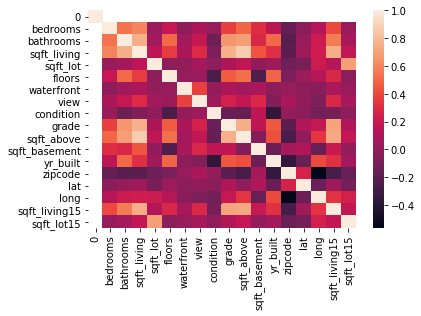

In [30]:
heatmap = pd.concat([y_train, X_train])
corr = heatmap.corr()
sns.heatmap(data = corr)
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)")

In [31]:
#heatmap_data

In [32]:
home_train_corr = home.corr()['price'].map(abs).sort_values(ascending = False)

In [33]:
home_train_corr

price            1.000000
sqft_living      0.702328
grade            0.667738
sqft_above       0.605143
sqft_living15    0.586415
bathrooms        0.525889
view             0.394885
sqft_basement    0.325008
bedrooms         0.309204
lat              0.306507
waterfront       0.265969
floors           0.256355
sqft_lot         0.087937
sqft_lot15       0.083192
yr_built         0.054459
zipcode          0.053166
condition        0.035290
long             0.022101
Name: price, dtype: float64

In [34]:
home['sqft_living'].describe()

count    21143.000000
mean      2080.920730
std        918.547562
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [35]:
most_correlated_feature = 'sqft_living'

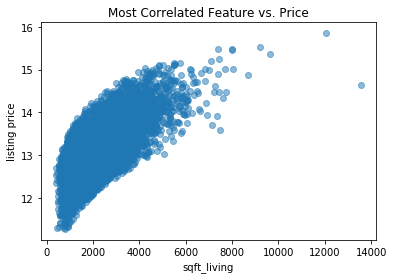

In [36]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

In [37]:
#trans_home = pd.get_dummies(home, prefix=['grade'], columns=['grade'])

In [38]:
baseline_model = LinearRegression()

In [39]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=45)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49205192955100036
Validation score: 0.48120571677653695


Because we are using the .score method of LinearRegression, these
are r-squared scores. That means that each of them represents the
amount of variance of the target (listing price) that is explained
by the model's features (currently just the number of pieces) and
parameters (intercept value and coefficient values for the features)

In general this seems like a fairly **WEAK model** . 


In [1]:
X_train_numeric = X_train.select_dtypes('number').copy()

#X_train_numeric

NameError: name 'X_train' is not defined

/Users/raylinsoriano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


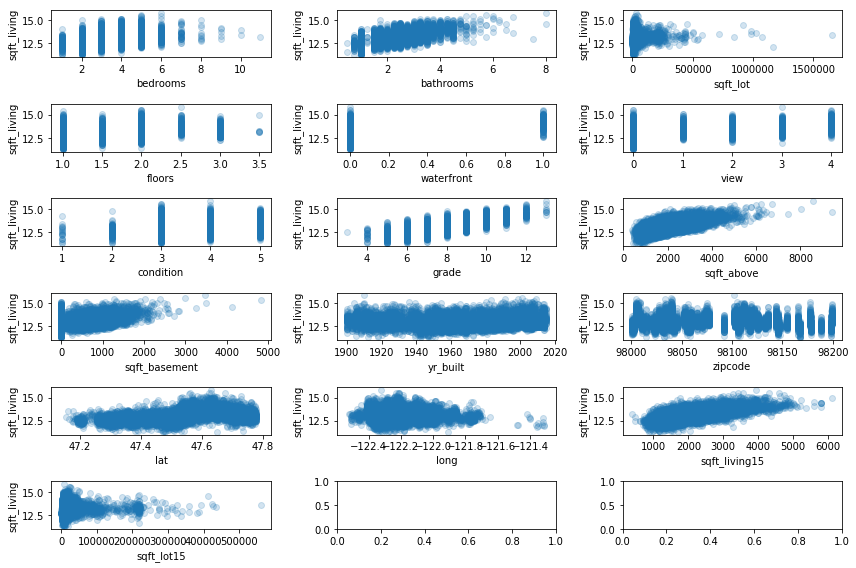

In [41]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols= 3, nrows= 6, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("sqft_living")

In [42]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: False


In [43]:
X_train_second_model = X_train_numeric.drop(['sqft_lot'], axis = 1).copy()

#X_train_second_model

In [44]:
#X_train_second_model = X_train_numeric.drop(['lat', 'long'], axis = 1).copy()

In [45]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7692081389001574
Validation score: 0.7627298121988701

Baseline Model
Train score:      0.49205192955100036
Validation score: 0.48120571677653695


In [46]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3490.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:15:49   Log-Likelihood:                -754.93
No. Observations:               15857   AIC:                             1542.
Df Residuals:                   15841   BIC:                             1665.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.6979      4.288     -1.329      0.184     -14.104       2.708
bedrooms         -0.0163      0.003     -5.599      0.000      -0.022      -0.011
bathrooms         0.0719      0.005     15.050      0.000       0.063       0.081
sqft_living    9.944e-05   3.36e-06     29.622      0.000    9.29e-05       0.000
floors            0.0765      0.005     14.401      0.000       0.066       0.087
waterfront        0.3560      0.027     13.135      0.000       0.303       0.409
view              0.0583      0.003     18.667      0.000       0.052       0.064
condition         0.0606      0.003     17.813      0.000       0.054       0.067
grade             0.1591      0.003     49.914      0.000       0.153       0.165
sqft_above     4.138e-05   3.34e-06     12.388      0.000    3.48e-05    4.79e-05
sqft_basement  5.807e-05    3.9e-06     14.884      0.000    5.04e-05    6.57e-05
yr_built         -0.0036      0.000    -35.620      0.000      -0.004      -0.003
zipcode          -0.0006   4.85e-05    -12.849      0.000      -0.001      -0.001
lat               1.3763      0.016     87.162      0.000       1.345       1.407
long             -0.1590      0.019     -8.327      0.000      -0.196      -0.122
sqft_living15  9.574e-05   5.02e-06     19.065      0.000    8.59e-05       0.000
sqft_lot15     3.399e-07   8.03e-08      4.230      0.000    1.82e-07    4.97e-07
==============================================================================
Omnibus:                      335.092   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.125
Skew:                          -0.029   Prob(JB):                    7.07e-162
Kurtosis:                       4.058   Cond. No.                     1.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.63e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
X_train_third_model = X_train_numeric.drop(['lat', 'long', 'zipcode', 'sqft_lot'], axis = 1).copy()

In [48]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6587972080814931
Validation score: 0.643897268926875

Baseline Model
Train score:      0.49205192955100036
Validation score: 0.48120571677653695


In [49]:
sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2509.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:15:50   Log-Likelihood:                -3885.3
No. Observations:               15857   AIC:                             7797.
Df Residuals:                   15844   BIC:                             7896.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.4485      0.220     97.478      0.000      21.017      21.880
bedrooms         -0.0277      0.004     -7.806      0.000      -0.035      -0.021
bathrooms         0.0790      0.006     13.584      0.000       0.068       0.090
sqft_living    9.789e-05   4.08e-06     23.965      0.000    8.99e-05       0.000
floors            0.1200      0.006     18.894      0.000       0.108       0.132
waterfront        0.3281      0.033      9.940      0.000       0.263       0.393
view              0.0352      0.004      9.348      0.000       0.028       0.043
condition         0.0426      0.004     10.383      0.000       0.035       0.051
grade             0.2066      0.004     54.634      0.000       0.199       0.214
sqft_above      2.27e-06   3.95e-06      0.574      0.566   -5.48e-06       1e-05
sqft_basement  9.562e-05   4.65e-06     20.567      0.000    8.65e-05       0.000
yr_built         -0.0055      0.000    -48.627      0.000      -0.006      -0.005
sqft_living15     0.0001   5.96e-06     19.149      0.000       0.000       0.000
sqft_lot15    -2.615e-07   9.59e-08     -2.726      0.006    -4.5e-07   -7.35e-08
==============================================================================
Omnibus:                       87.535   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.580
Skew:                          -0.117   Prob(JB):                     1.95e-23
Kurtosis:                       3.322   Cond. No.                     3.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.35e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
categoricals = ['bedrooms','bathrooms','floors', 'waterfront', 'condition','grade']

X_train_categoricals = X_train.loc[:,categoricals]

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
X_train_trans_categ = ohe.fit_transform(X_train_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X_rest = X_train.drop(categoricals, axis=1)

In [52]:
X_train_combine = pd.concat([X_rest, X_train], axis=1)


In [53]:
X_train_combine

,sqft_living,sqft_lot,view,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,...,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12998,2950,5803,0.0,2950,0.0,2007,98028,47.7368,-122.231,2940,...,3,9,2950,0.0,2007,98028,47.7368,-122.231,2940,5803
13728,3520,12350,4.0,1530,1990.0,1960,98116,47.5837,-122.382,2140,...,4,8,1530,1990.0,1960,98116,47.5837,-122.382,2140,7800
8854,2560,83200,0.0,1860,700.0,1980,98072,47.7511,-122.111,1990,...,3,8,1860,700.0,1980,98072,47.7511,-122.111,1990,38332
16477,2020,7800,0.0,1330,690.0,1958,98133,47.7368,-122.337,1870,...,4,7,1330,690.0,1958,98133,47.7368,-122.337,1870,7800
12753,1290,6528,0.0,1290,0.0,1941,98115,47.6940,-122.290,1670,...,4,7,1290,0.0,1941,98115,47.6940,-122.290,1670,5712
14137,900,2728,0.0,900,0.0,1998,98144,47.5877,-122.298,900,...,3,7,900,0.0,1998,98144,47.5877,-122.298,900,2728
2766,2770,10000,1.0,1640,1130.0,1962,98033,47.7011,-122.206,2450,...,5,8,1640,1130.0,1962,98033,47.7011,-122.206,2450,10000
8784,1870,4984,0.0,1120,750.0,1955,98116,47.5771,-122.391,1650,...,3,7,1120,750.0,1955,98116,47.5771,-122.391,1650,5750
1278,2470,4565,0.0,2470,0.0,2005,98056,47.5140,-122.189,2470,...,3,7,2470,0.0,2005,98056,47.5140,-122.189,2470,5064
2688,1960,7133,0.0,1960,0.0,2002,98056,47.4941,-122.190,1960,...,3,7,1960,0.0,2002,98056,47.4941,-122.190,1960,6705


In [54]:
X_train_fourth_model = X_train_combine

In [55]:
fourth_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model


NameError: name 'fourth_model_scores' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder object to create dummies by dropping the first category
ohe = OneHotEncoder(drop = 'first')

# Transform the dataset into dummies matrix
trans = ohe.fit_transform(X_train_combine)

# Dummies values in matrix form (without column names)
data = trans.todense()

# New dummy column names
names = ohe.get_feature_names()

# Combine the values and column names into single dataframe
trans_home= pd.DataFrame(data, columns=names)